In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [5]:
importlib.reload(EyeTraumaAnalysis);

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

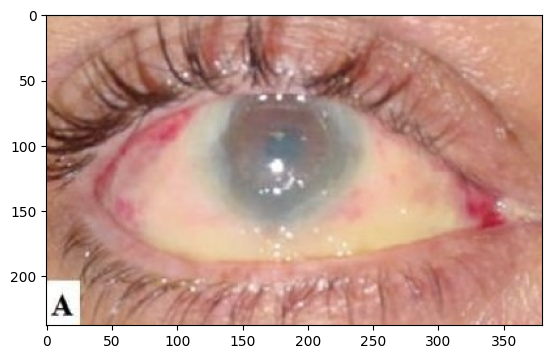

In [3]:
image = EyeTraumaAnalysis.Image("data/01_raw/00001_li.jpg")
plt.imshow(image.img);

In [4]:
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=10,
    wd_px=20,
    center=image.center )

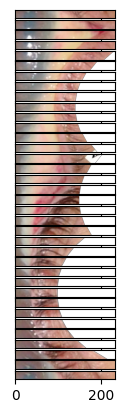

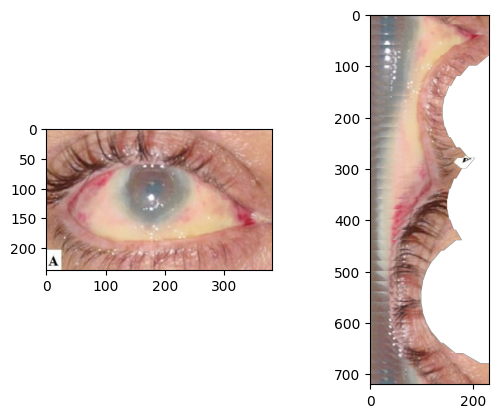

In [5]:
fig, axs = plt.subplots(len(segments), 1, sharex=True, sharey=True)
for ind, (deg, segment) in enumerate(segments.items()):
    axs[ind].imshow(segment)
    axs[ind].set_yticks([])

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(np.vstack([segment for ind,segment in segments.items()]));

In [3]:
image = EyeTraumaAnalysis.Image("data/01_raw/11004.jpg")
interval_deg = 10
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=interval_deg,
    wd_px=20,
    center=image.center, borderValue=(0,0,0,0) )

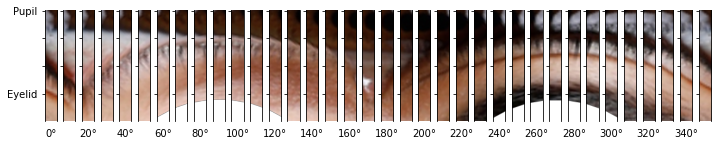

In [18]:
length = segment.shape[1]
fig, axs = plt.subplots(1, len(segments), sharex=True, sharey=True, figsize=(12,2), dpi=72)
for ind, (deg, segment) in enumerate(segments.items()):
    axs[ind].imshow(np.transpose(segment, axes=[1,0,2]))
    axs[ind].set_xticks([])
    axs[ind].set_yticks([0, int(length/4), int(length/2), int(length*3/4)])
    axs[ind].set_yticklabels(["Pupil", "","","Eyelid"])
    if ind % 2 == 0:
        axs[ind].set_xlabel(f"{ind*interval_deg}°")
    axs[ind].spines["top"].set_visible(False)
    axs[ind].spines["bottom"].set_visible(False)

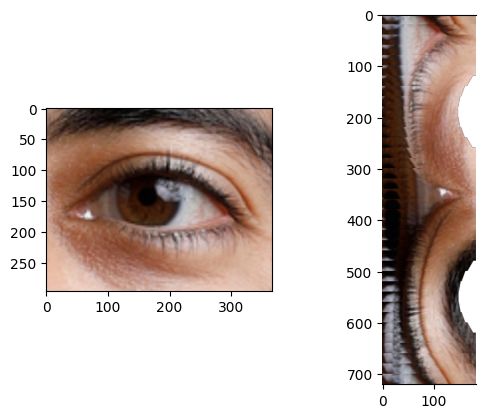

In [22]:
concatenated = np.vstack([segment for ind,segment in segments.items()])
fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(concatenated);
axs[1].spines["left"].set_visible(False)
axs[1].spines["right"].set_visible(False)

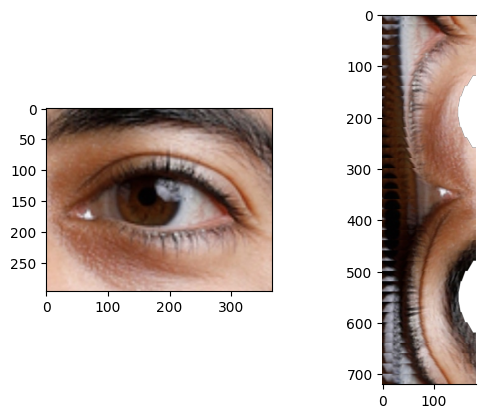

In [6]:
concatenated = np.vstack([segment for ind,segment in segments.items()])
fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(concatenated);
axs[1].spines["left"].set_visible(False)
axs[1].spines["right"].set_visible(False)